# Decision Tree Regression

## Importing the libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

## Importing the dataset

In [32]:
df = pd.read_csv('/content/weather.csv')

In [33]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [34]:
df.head()

,PRCP,TMAX,Year,Month,Day
0,0.01,81,2010,8,1
1,0.04,82,2010,8,2
2,0.00,84,2010,8,3
3,0.00,93,2010,8,4
4,1.03,95,2010,8,5


In [35]:
X = df.iloc[:, 2:5].values
y = df.iloc[:, 0].values

In [36]:
print(X.shape, y.shape)

(3806, 3) (3806,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3044, 3) (762, 3) (3044,) (762,)


## Training the Decision Tree Regression model on the whole dataset

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [45]:
yhat = regressor.predict(X_test)

## Visualising the Decision Tree Regression results

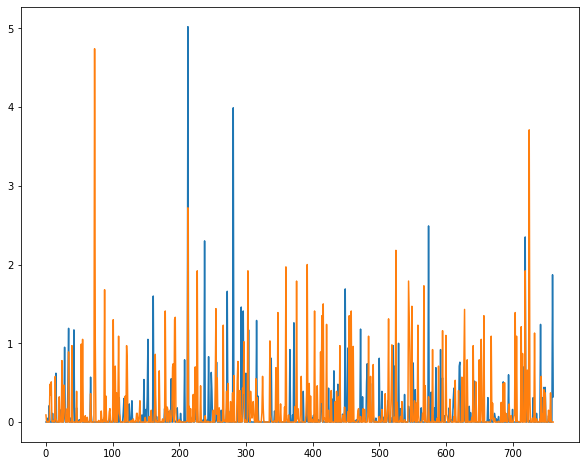

In [46]:
plt.plot(y_test)
plt.plot(yhat)
plt.gcf().set_size_inches(10,8)
plt.show()

**TEMPERATURE**

In [47]:
Xt = df.iloc[:, 2:5].values
yt = df.iloc[:, 1].values

In [48]:
print(Xt.shape, yt.shape) 

(3806, 3) (3806,)


In [49]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(Xt_train, yt_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [51]:
tpred = regressor.predict(Xt_test)

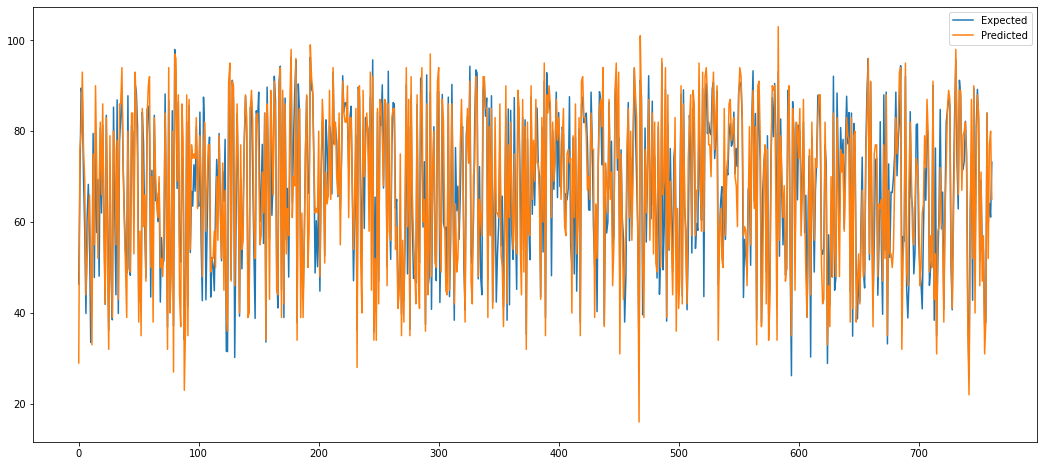

In [66]:
plt.plot(tpred,label='Expected')
plt.plot(yt_test,label='Predicted')
plt.gcf().set_size_inches(18,8)
pyplot.legend()
plt.show()

In [67]:
# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Regression")

print ("Training Accuracy: {}".format(regressor.score(Xt_train, yt_train)))
predicted = regressor.predict(Xt_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=Xt_train, y=yt_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Decision Tree Regression
Training Accuracy: 0.9691451807578483


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.86362012 0.8054823  0.8254371  0.80810451 0.82390157 0.79599843
 0.81446134 0.81812047 0.80866361 0.79933631]


Mean accuracy: 0.8163125757701275
Standard Deviation: 0.018247140384863584
